# Vanila autoencoder W/O Cross Vaalidation

LOAD DATASET

In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Function to load and preprocess images
def load_images_and_labels(dataset_path, image_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))  # Sorted class names
    class_to_index = {cls_name: idx for idx, cls_name in enumerate(class_names)}  # Map classes to indices
    for cls_name in class_names:
        class_path = os.path.join(dataset_path, cls_name)
        if os.path.isdir(class_path):  # Only process directories
            for file_name in os.listdir(class_path):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    img_path = os.path.join(class_path, file_name)
                    img = tf.keras.utils.load_img(img_path, color_mode="grayscale", target_size=image_size)
                    img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalize to [0, 1]
                    images.append(img_array)
                    labels.append(class_to_index[cls_name])
                else:
                    print(f"Skipped file: {file_name}")
    return np.array(images), np.array(labels), class_names

# Dataset path and image size
dataset_path = "E:\\Fall 2024\\CI\\Project\\bollywood dataset//bollywood_celeb_faces_0"
image_size = (112, 112)  # Resize images to 112x112

# Load dataset
images, labels, class_names = load_images_and_labels(dataset_path, image_size)
print(f"Loaded {images.shape[0]} images with shape {images.shape[1:]} and {len(class_names)} classes.")




Skipped file: pic3 (1)
Skipped file: pic 4 (1)
Skipped file: pic 5 (1)
Skipped file: pic 6 (1)
Skipped file: pic7 (1)
Skipped file: pic8 (1)
Skipped file: pic9 (1)
Skipped file: pic10 (1)
Skipped file: pic11 (1)
Skipped file: pic12 (1)
Skipped file: pic13 (1)
Skipped file: pic14 (1)
Skipped file: pic15 (1)
Skipped file: pic16 (1)
Skipped file: pic17 (1)
Skipped file: pic18 (1)
Skipped file: pic19 (1)
Skipped file: pic20 (1)
Skipped file: oic21 (1)
Skipped file: pic 22 (1)
Skipped file: pic23 (1)
Skipped file: pic24 (1)
Skipped file: pic25 (1)
Skipped file: pic26 (1)
Skipped file: pic27 (1)
Skipped file: pic 28 (1)
Skipped file: pic28 (1)
Skipped file: pic29 (1)
Skipped file: pic29 (1)
Skipped file: pic30 (1)
Skipped file: pic31 (1)
Skipped file: x1 (1)
Skipped file: x2 (1)
Skipped file: x3 (1)
Skipped file: x4 (1)
Skipped file: x5 (1)
Skipped file: x6 (1)
Skipped file: x7 (1)
Skipped file: x8 (1)
Skipped file: x9 (1)
Skipped file: x10 (1)
Skipped file: x11 (1)
Skipped file: x12 (1)
Ski

Apply autoencoder

Training: 5453, Validation: 1168, Testing: 1169


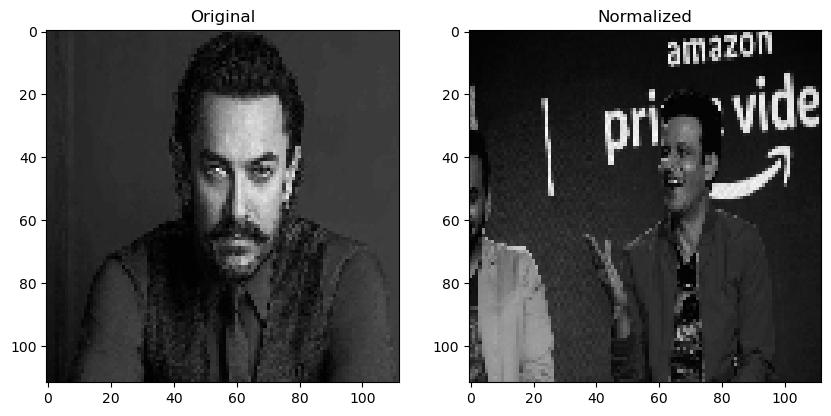

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.8964 - val_loss: 0.7689
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7267 - val_loss: 0.7451
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7174 - val_loss: 0.7330
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7019 - val_loss: 0.7272
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6951 - val_loss: 0.7212
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6842 - val_loss: 0.7191
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6850 - val_loss: 0.7147
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6724 - val_loss: 0.7125
Epoch 9/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6713 - val_loss: 0.7104
Epoch 10/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6685 - val_loss: 0.7074
Epoch 11/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6691 - val_loss: 0.7077
Epoch 12/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 

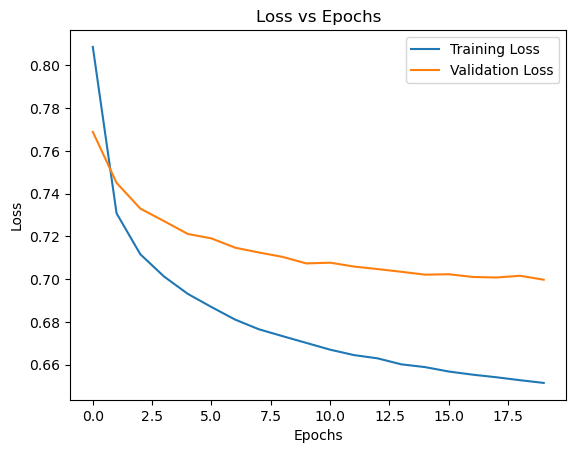

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


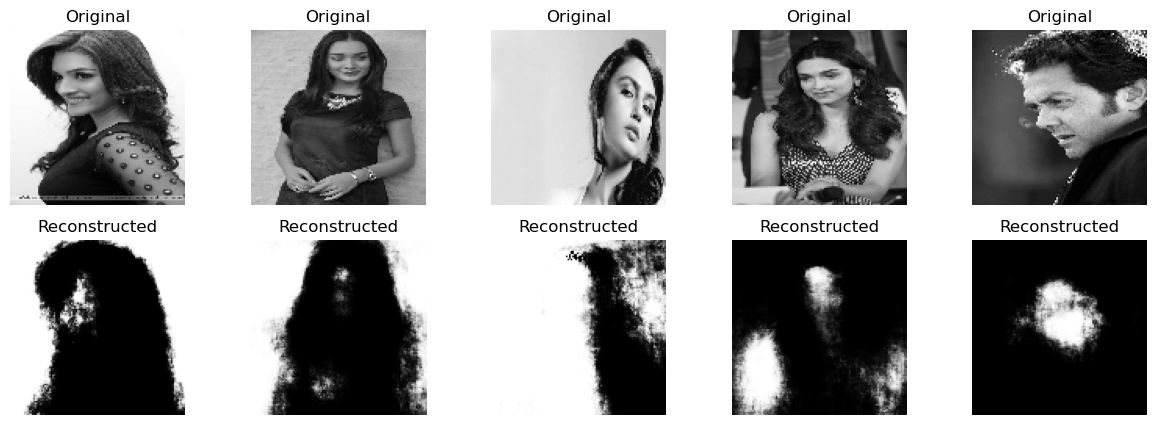

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Recognition Accuracy: 6.42%


In [6]:
# Split dataset (70% training, 15% validation, 15% testing)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=42)

print(f"Training: {train_images.shape[0]}, Validation: {val_images.shape[0]}, Testing: {test_images.shape[0]}")

# Normalize data (subtract mean and divide by std)
mean = np.mean(train_images)
std = np.std(train_images)

train_images = (train_images - mean) / std
val_images = (val_images - mean) / std
test_images = (test_images - mean) / std

# Visualize normalized data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(images[0].reshape(112, 112), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Normalized")
plt.imshow(train_images[0].reshape(112, 112), cmap="gray")
plt.show()

# Build Vanilla Autoencoder
input_shape = (112, 112, 1)

# Encoder
def build_encoder():
    encoder_input = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Flatten()(encoder_input)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    encoder_output = tf.keras.layers.Dense(32, activation='relu')(x)
    return tf.keras.Model(encoder_input, encoder_output, name="Encoder")

# Decoder
def build_decoder():
    decoder_input = tf.keras.layers.Input(shape=(32,))
    x = tf.keras.layers.Dense(64, activation='relu')(decoder_input)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(np.prod(input_shape), activation='sigmoid')(x)
    decoder_output = tf.keras.layers.Reshape(input_shape)(x)
    return tf.keras.Model(decoder_input, decoder_output, name="Decoder")

# Combine Encoder and Decoder
encoder = build_encoder()
decoder = build_decoder()
autoencoder_input = tf.keras.layers.Input(shape=input_shape)
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(autoencoder_input, decoded, name="Autoencoder")

# Compile Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(val_images, val_images),
    epochs=20,
    batch_size=32
)

# Visualize Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test Autoencoder
reconstructed_images = autoencoder.predict(test_images)

# Visualize Original vs Reconstructed
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(112, 112), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_images[i].reshape(112, 112), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# Extract Features from Encoder
encoded_features = encoder.predict(test_images)

# Recognition Accuracy using Euclidean Distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

predicted_labels = []

for i, feature in enumerate(encoded_features):
    # Compute distances to all other features except the current one
    distances = [euclidean_distance(feature, f) if i != j else np.inf for j, f in enumerate(encoded_features)]
    closest_index = np.argmin(distances)  # Find the index of the closest match
    predicted_labels.append(test_labels[closest_index])  # Use the closest match's label

accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Recognition Accuracy: {accuracy * 100:.2f}%")